<p style="font-size:300%; background-color:gray; color:white; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Tarea 6. Operaciones Morfológicas en Imagenes</p>
<p style="font-size:240%; background-color:gray; color:white; text-align:center;line-height : 60px; margin : 0; padding : 0;">
Visión de Máquina</p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>Jefferson Javier Hernández Panqueba</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email: jejhernandezpa@unal.edu.co</p>
<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> 
<br>Jaime Andrés Castillo León</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email:jacastillol@unal.edu.co</p>
<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>12 de Marzo de 2018</p>

<h1 style="font-size:200%; background-color:gray; color:white; text-align:center; line-height : 60px;">
Contenido </h1>

<ul style="font-size:140%; line-height : 25px;">
  <li>Implementar y evaluar el algoritmo de dilatación direccional</li>
  <li>Implementar y evaluar el algoritmo de adelgazamiento por morfología matemática</li>
</ul>


<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernández & J.A. Castillo </h1>

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import distance

<h1 style="font-size:200%; background-color:gray; color:white; text-align:center; line-height : 60px;">
Dilatación Direccional </h1>

<ul style="font-size:140%; line-height : 25px;">
  <li>Mediante la modificación del elemento estructurante, la magnitud y la fuerza de atracción entre objetos en la imágen, ésta metodología busca realizar una dilatación más eficiente.</li>
  <li>La dirección y la fuerza de atracción de un objeto es función de: 1) La masa de los objetos vecinos, 2)La distancia entre los centroides de los objetos, 3) la posición relativa de los objetos.</li>
  <li>El vector de fuerza de dilatación es definido como: $D=\beta a_1 a_2 e^{\frac{[d(c_1,c_2)]^2}{\alpha^2}}$.</li>
  <li>Donde $\beta$ es una constante de escalamiento, $a_1$ y $a_2$ son las áreas de los objetos, $d(.,.)$ es una función de distancia entre vectores, $c_1$ y $c_2$ son los centroides de los objetos considerados y $\alpha$ es una constante que controla el tamaño del vecindario de influencia de un objeto sobre otro.</li>
  <li>Debido a la naturaleza discreta de la imágenes, se consideran únicamente ocho direcciones, como se muestra en la figura: </li>
</ul>

<img src="dir.png",width=200,height=200>

<ul style="font-size:140%; line-height : 25px;">
  <li>Si un objeto está en una region del objeto en crecimiento, por ejemplo NE, entonces se calcula la magnitud de la
fuerza de atracción usando el operador D, y se asigna como dirección dicha región (NE). </li>
  <li>Para cada objeto de la imagen, se calcula una magnitud de atracción para las ocho direcciones, sumando todas
las fuerzas de atracción causadas por objetos en cada región, de acuerdo a la siguiente ecuación: </li>
  <li>$D=\beta \sum_k a_i a_k e^{\frac{[d(c_i,c_k)]^2}{\alpha^2}}$ </li>
  <li> $\forall i=1, ... , N_0$ y $\forall j=1, ... , N_r$  </li>
  <li> Donde: $i$ es el índice del objeto actual, $N_0$ es el número de objetos individuales en la imagen,$j$ es el índice de la región actual, $N_r$ es el número de regiones radiales (direcciones posibles de crecimiento), y $k$ es el índice de todos los objetos en la región $j$, que contribuyen a la fuerza de atracción. </li>
   <li>Es conveniente normalizar las magnitudes de los N vectores de fuerza por la magnitud máxima en el conjunto, de modo que dichas magnitudes varíen de 0 a 1 para cada objeto. </li>
  <li>Una vez obtenido lo anterior, se puede fijar un valor de umbral de fuerza de dilatación $D$, tal que los objetos cuyas magnitudes máximas del vector de fuerza caigan por debajo de D, queden excluidos del proceso de dilatación. </li>
  <li>La dilatación direccional de la imagen se logra mediante el uso de N kernels diferentes. </li>
  <li>Una vez establecidas las magnitudes del vector de fuerzas normalizadas y los kernels correspondientes, cada objeto
de la imagen se dilata con el kernel, o conjunto de kernels, lo que hace que se expanda el numero de veces según $D$ que corresponda, en la dirección o direcciones deseadas. </li>
</ul>


<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernández & J.A. Castillo </h1>

In [2]:
# calculo del angulo entre centroides
def angle_v(vec1,vec2):
    ax=float(vec1[0])    
    ay=float(-vec1[1])
    bx=float(vec2[0])
    by=float(-vec2[1])
    if by==ay:
        if ax>bx:
            angle2=180
        else:
            angle2=0
    elif ax==bx: 
        if by>bx:
            angle2=90
        else:
            angle2=270
    elif ax>bx:
        angle2=np.arctan((ay-by)/(ax-bx))*(180/np.pi)+180        
    elif ax<bx and by<ay:
        angle2=np.arctan((ay-by)/(ax-bx))*(180/np.pi)+360
    else:
        angle2=np.arctan((ay-by)/(ax-bx))*(180/np.pi)
    return (angle2)

# calculo de distancia y angulos entre los cenroides 
def dis_angle(centro,num_of_obj):
    
    dis=np.zeros((num_of_obj,num_of_obj),np.int16)
    angle=np.zeros((num_of_obj,num_of_obj),np.int16)
    
    for i in range (1,num_of_obj+1):
        for j in range (1,num_of_obj+1):
            dis[i-1,j-1] = distance.euclidean((centro[i-1,0],centro[i-1,1]),(centro[j-1,0], centro[j-1,1]))
            vec1=(centro[i-1,0],centro[i-1,1])
            vec2=(centro[j-1,0],centro[j-1,1])
            angle[i-1,j-1]=angle_v(vec1,vec2)
    return (dis,angle)

def fue_dila(centro,dista,angu,alpha,beta,num_of_obj):
    b=float(beta)
    al=float(alpha)
    D=np.zeros((num_of_obj,num_of_obj))
    for i in range (1,num_of_obj+1):
        for j in range (1,num_of_obj+1):
            a1=float(centro[i-1,2])
            a2=float(centro[j-1,2])
            di=float(dista[i-1,j-1])
            D[i-1,j-1]=b*a1*a2*np.exp(-((di*di)/(al*al)))
    return (D)

def D_norm_umbral(regiones,num_of_obj):
    D_sum=np.zeros((num_of_obj,regiones))
    Nite_dir=np.zeros((num_of_obj,regiones))
    a=1
    for i in range (0,num_of_obj):
        for j in range (0,num_of_obj):
            r=1
            angul=angulos[i,j]
            if 0<angul and 45>angul:
                D_sum[i,0]=Ds[i,j]+D_sum[i,0]
            elif 45<=angul and 90>angul:
                D_sum[i,1]=Ds[i,j]+D_sum[i,1]
            elif 90<=angul and 135>angul:
                D_sum[i,2]=Ds[i,j]+D_sum[i,2]
            elif 135<=angul and 180>angul:
                D_sum[i,3]=Ds[i,j]+D_sum[i,3]
            elif 180<=angul and 225>angul:
                D_sum[i,4]=Ds[i,j]+D_sum[i,4]
            elif 225<=angul and 270>angul:
                D_sum[i,5]=Ds[i,j]+D_sum[i,5]
            elif 270<=angul and 315>angul:
                D_sum[i,6]=Ds[i,j]+D_sum[i,6]
            elif 315<=angul and 360>angul:
                D_sum[i,7]=Ds[i,j]+D_sum[i,7]
    zmax=float(np.amax(D_sum))
    D_sum_N=D_sum/zmax
    D_umbral=0.25
    for i in range (0,num_of_obj):
        for j in range (0,regiones):
            temp=D_sum_N[i,j]
            if temp<D_umbral:
                Nite_dir[i,j]=0
            elif D_umbral<temp and temp<=2*D_umbral:
                Nite_dir[i,j]=1
            elif 2*D_umbral<temp and temp<=3*D_umbral:
                Nite_dir[i,j]=2
            elif 3*D_umbral<temp and temp<=4*D_umbral:
                Nite_dir[i,j]=3                
    
    return (D_sum_N,Nite_dir)

(<matplotlib.text.Text at 0x7f62a012e050>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

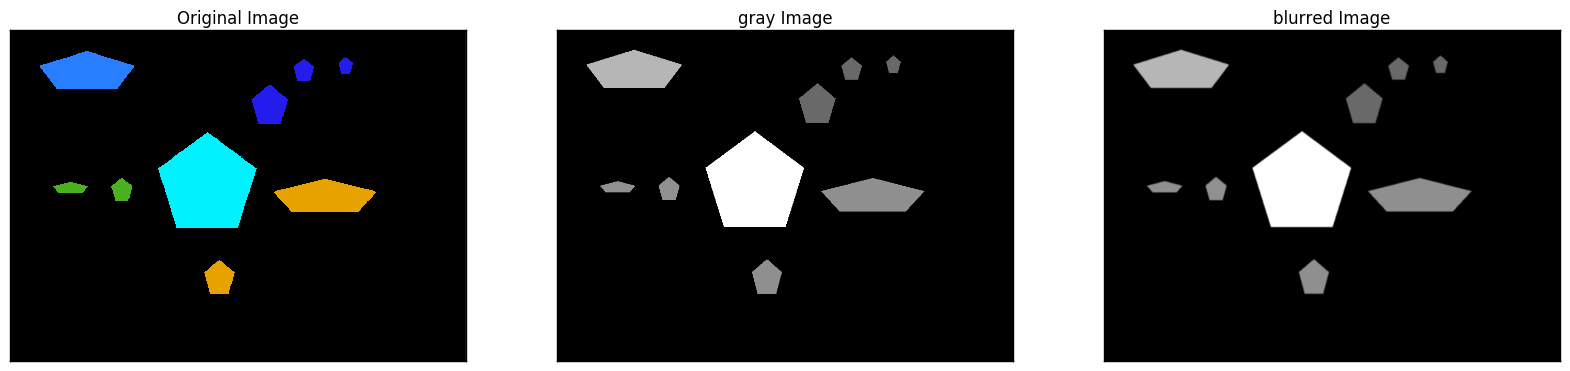

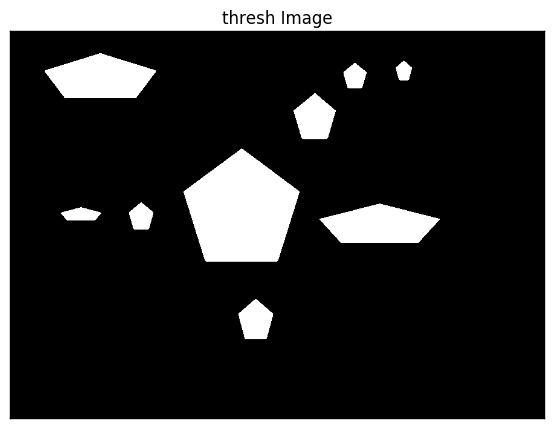

In [3]:
# cargar la imagen y binarizarla
image = cv2.imread('test2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]                                                         
plt.figure(1,figsize=(20,5))
plt.subplot(131),plt.imshow(image, cmap = 'gray',interpolation='none')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(gray, cmap = 'gray')
plt.title('gray Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blurred, cmap = 'gray')
plt.title('blurred Image'), plt.xticks([]), plt.yticks([])
plt.figure(2,figsize=(20,5))
plt.subplot(121),plt.imshow(thresh, cmap = 'gray')
plt.title('thresh Image'), plt.xticks([]), plt.yticks([])


centroids and area
[[  406   481  2615]
 [  117   305   981]
 [  611   323  8837]
 [  216   310  1229]
 [  382   299 24691]
 [  503   147  3582]
 [  570    78  1089]
 [  651    69   579]
 [  149    80  9392]]
distancia
[[  0 338 258 255 183 347 435 479 476]
 [338   0 494  99 265 417 506 583 227]
 [258 494   0 395 230 206 248 257 522]
 [255  99 395   0 166 330 423 497 239]
 [183 265 230 166   0 194 290 353 319]
 [347 417 206 330 194   0  96 167 360]
 [435 506 248 423 290  96   0  81 421]
 [479 583 257 497 353 167  81   0 502]
 [476 227 522 239 319 360 421 502   0]]
angulos
[[  0 148  37 138  97  73  67  59 122]
 [328   0 357 357   1  22  26  23  81]
 [217 177   0 178 174 121  99  81 152]
 [318 177 358   0   3  29  33  28 106]
 [277 181 354 183   0  51  49  40 136]
 [253 202 301 209 231   0  45  27 169]
 [247 206 279 213 229 225   0   6 180]
 [239 203 261 208 220 207 186   0 181]
 [302 261 332 286 316 349   0   1   0]]
Vector de fuerzas de dilatación
[[  6.83822500e+07   1.47486487e+06  

(<matplotlib.text.Text at 0x7f62a0051390>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

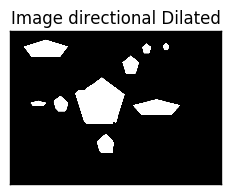

In [4]:
# encontrar los contornos en la imagen 
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# colocar en falso si es openCV 3
is_cv2 = False #True
cnts = cnts[0] if is_cv2 else cnts[1]
# contar el numero de objetos
j=0; i=0
num=0
for c in cnts:
    num=num+1
centroids = np.zeros((num,3),np.int16)

# calcular los centorides y el area de los objetos 
for c in cnts:    
	M = cv2.moments(c)
	area=cv2.contourArea(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
	centroids[i,0]=cX
	centroids[i,1]=cY
	centroids[i,2]=area    
	i=i+1
print "centroids and area"
print centroids

# calcular la distancia y los angulos entre centorides 
distancia,angulos=dis_angle(centroids,num)
print "distancia"
print distancia
print "angulos"
print angulos

# Calcular la fuerza de dialtación

Ds=fue_dila(centroids,distancia,angulos,200,10,num)
print "Vector de fuerzas de dilatación"
print Ds

# las fuerzas por regiones  y el numero de iteraciones de dilatación
D_sum_N,Nite_dir=D_norm_umbral(8,num)

#print "Vector de fuerzas suma Normalizados y umbralizados"
#print D_sum_N

print "Numero de itearciones direccional"
print Nite_dir

num_of_obj=num
regiones=8
for i in range (0,num_of_obj-1):
    im_new=thresh
    cx=int(centroids[i,0])
    cy=int(centroids[i,1])
    a=int(centroids[i,2])
    r=np.sqrt(a/np.pi)
    ofx1 = int(cx-1.5*r)
    ofy1 = int(cy-1.5*r)
    ffx = int(cx+1.5*r)
    ffy = int(cy+1.5*r)
    for j in range (0,regiones):
        nu_ite=Nite_dir[i,j]
        size=1
        while True:
            reg=j+1
            if reg==1 and nu_ite>0:
                K = np.array([[0,0,0],[0,1,1],[0,0,0]],np.uint8)
                peda=thresh[ofx1:ffx,ofy1:ffy]
                im_new[ofx1:ffx,ofy1:ffy]=cv2.dilate(peda,K,iterations = 3)
                size=size+1
                if size>nu_ite:
                    break
            elif reg==2 and nu_ite>0:
                K = np.array([[0,0,1],[0,1,0],[0,0,0]],np.uint8)
                ofx = int(np.floor(K.shape[0])/2)
                ofy = int(np.floor(K.shape[1])/2)
                peda=thresh[ofx1:ffx,ofy1:ffy]
                im_new[ofx1:ffx,ofy1:ffy]=cv2.dilate(peda,K,iterations = 3)
                size=size+1
                if size>nu_ite:
                    break
            elif reg==3 and nu_ite>0:
                K = np.array([[0,1,0],[0,1,0],[0,0,0]],np.uint8)
                ofx = int(np.floor(K.shape[0])/2)
                ofy = int(np.floor(K.shape[1])/2)
                peda=thresh[ofx1:ffx,ofy1:ffy]
                im_new[ofx1:ffx,ofy1:ffy]=cv2.dilate(peda,K,iterations = 3)
                size=size+1
                if size>nu_ite:
                    break
            elif reg==4 and nu_ite>0:
                K = np.array([[1,0,0],[0,1,0],[0,0,0]],np.uint8)
                ofx = int(np.floor(K.shape[0])/2)
                ofy = int(np.floor(K.shape[1])/2)
                peda=thresh[ofx1:ffx,ofy1:ffy]
                im_new[ofx1:ffx,ofy1:ffy]=cv2.dilate(peda,K,iterations = 3)
                size=size+1
                if size>nu_ite:
                    break
            elif reg==5 and nu_ite>0:
                K = np.array([[0,0,0],[1,1,0],[0,0,0]],np.uint8)
                ofx = int(np.floor(K.shape[0])/2)
                ofy = int(np.floor(K.shape[1])/2)
                peda=thresh[ofx1:ffx,ofy1:ffy]
                im_new[ofx1:ffx,ofy1:ffy]=cv2.dilate(peda,K,iterations = 3)
                size=size+1
                if size>nu_ite:
                    break
            elif reg==6 and nu_ite>0:
                K = np.array([[0,0,0],[0,1,0],[1,0,0]],np.uint8)
                ofx = int(np.floor(K.shape[0])/2)
                ofy = int(np.floor(K.shape[1])/2)
                peda=thresh[ofx1:ffx,ofy1:ffy]
                im_new[ofx1:ffx,ofy1:ffy]=cv2.dilate(peda,K,iterations = 3)
                size=size+1
                if size>nu_ite:
                    break
            elif reg==7 and nu_ite>0:
                K = np.array([[0,0,0],[0,1,0],[0,1,0]],np.uint8)
                ofx = int(np.floor(K.shape[0])/2)
                ofy = int(np.floor(K.shape[1])/2)
                peda=thresh[ofx1:ffx,ofy1:ffy]
                im_new[ofx1:ffx,ofy1:ffy]=cv2.dilate(peda,K,iterations = 3)
                size=size+1
                if size>nu_ite:
                    break
            elif reg==8 and nu_ite>0:
                K = np.array([[0,0,0],[0,1,0],[0,0,1]],np.uint8)
                ofx = int(np.floor(K.shape[0])/2)
                ofy = int(np.floor(K.shape[1])/2)
                peda=thresh[ofx1:ffx,ofy1:ffy]
                im_new[ofx1:ffx,ofy1:ffy]=cv2.dilate(peda,K,iterations = 3)
                size=size+1
                if size>nu_ite:
                    break
            elif nu_ite==0:break
                
                    
plt.subplot(122),plt.imshow(im_new, cmap = 'gray')
plt.title('Image directional Dilated'), plt.xticks([]), plt.yticks([])

<h1 style="font-size:200%; background-color:gray; color:white; text-align:center; line-height : 60px;">
Adelgazamiento </h1>

<ul style="font-size:140%; line-height : 25px;">
   <li> Mediante operaciones morfologicas es posible aplicar un adelgazamiento a una imagen mediante el operador hit_or_miss, que a su vez esta conformado por los operadores de dilatación y erosión. Estos ultimos son desarrollados mediante dos operaciones basicas, la traslación y la reflexion </li>
   <li> Los operadores de cierre, apertura y extración de bordes, son implementados para probar el buen funcionamiento de la erosión y la dilatación </li>
   <li> Acontinuación se definen estos operadores, y se prueba su rendimiento con varias imagenes </li>
</ul>

<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernández & J.A. Castillo </h1>

In [5]:
def reflect(B):
    return tuple(-b for b in B)

def translate(B,z):
     return tuple(b+z[i] for i,b in enumerate(B))

def erode(im,im_op,z_op):
    Bo = np.nonzero(im_op)
    B = translate(Bo,-z_op)
    im_e = np.zeros_like(im)
    r_im,c_im = im.shape
    r_op,c_op = im_op.shape
    for i in range(0,r_im):
        for j in range(0,c_im):
            z = np.array([i,j])
            Bz = translate(B,z)
            if np.any(np.array(Bz)<0) or \
               np.any(Bz[0]>=r_im) or np.any(Bz[1]>=c_im):
                continue
            im_e[i,j] = np.all((1-im[Bz[0],Bz[1]])==0)
    return im_e

def dilate(im,im_op,z_op):
    Bo = np.nonzero(im_op)
    B = translate(Bo,-z_op)
    W = reflect(B)
    im_d = np.zeros_like(im)
    r_im,c_im = im.shape
    r_op,c_op = im_op.shape
    for i in range(0,r_im):
        for j in range(0,c_im):
            z = np.array([i,j])
            Wz = translate(W,z)
            if np.any(np.array(Wz)<0) or \
               np.any(Wz[0]>=r_im) or np.any(Wz[1]>=c_im):
                continue
            im_d[i,j] = np.any((im[Wz[0],Wz[1]])==1)
    return im_d

def opening(im,im_op,z_op):
    return dilate(erode(im,im_op,z_op),im_op,z_op)

def closing(im,im_op,z_op):
    return erode(dilate(im,im_op,z_op),im_op,z_op)

def boundary(im,im_op,z_op):
    return im - erode(im,im_op,z_op)

def hitormiss(im,im_op,z_op):
    # A**B = (A -- B1)-(A ++ ^B2)
    # A**B = (A -- B1)-((A^c -- B2)^c)
    im_op1,im_op2 = im_op
    im_h = erode(im,im_op1,z_op) - (1-erode(1-im,im_op2,z_op))
    im_h[im_h<1] = 0
    return im_h

def thinning(im,im_op,z_op):
    return im-hitormiss(im,im_op,z_op)


In [6]:
# gonzalez's book example
def gonzalexample():
    im = np.zeros((7,15))
    im[1:-1,1:-1] = 1
    im[1,5:10] = im[-2,5:10] = 0
    return im 

def gonzalexampleHitormiss():
    im = np.zeros((7,15))
    im[1:-1,1:-1] = 1
    im[1,5:10] = im[-2,5:10] = 0
    return im 

# martian
def martian():
    im = np.zeros((10,13))
    im[np.array([1,1,2,2,4,4,4, 4,6, 6,7,7,7, 7]),
       np.array([3,9,4,8,2,3,9,10,1,11,1,3,9,11])] = 1
    im[3,np.arange(3,10)] = 1
    im[4,np.arange(5,8)] = 1
    im[5,np.arange(1,12)] = 1
    im[6,np.arange(3,10)] = 1
    im[8,np.arange(4,9)] = 1
    im[8,6] = 0
    return im

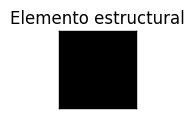

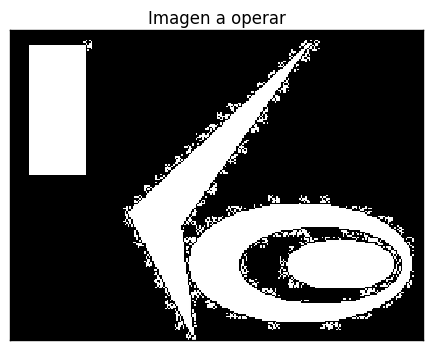

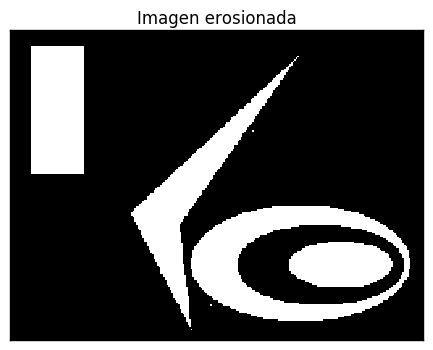

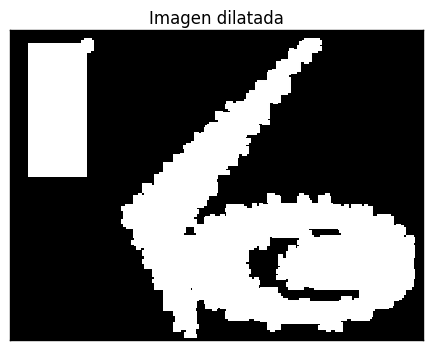

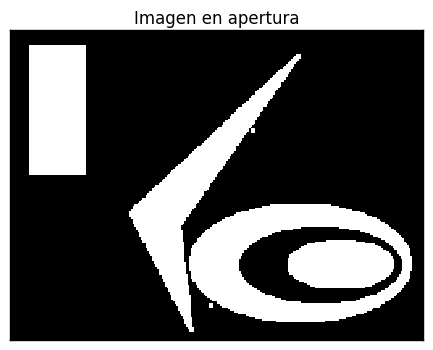

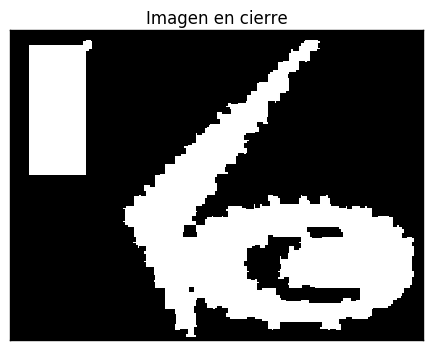

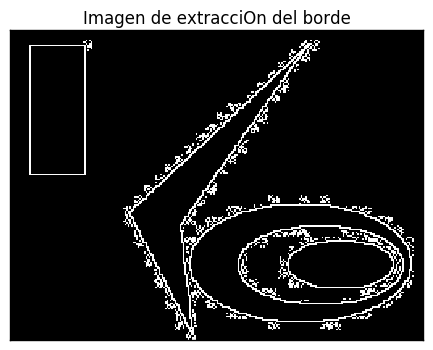

In [7]:
#im = gonzalexample()
#im = martian()
im = cv2.imread('binary.png',0)
#im = cv2.imread('martian.png',0)
#im = cv2.imread('image_thumb.png',0)
im[im>0] = 1

#im_op = np.ones((1,2))
#im_op = np.ones((2,1))
#im_op = np.ones((2,2)); im_op[1,1] = 0
#im_op = np.zeros((3,3)); im_op[:2,:2] = 1
im_op = np.ones((3,3))
#im_op = np.ones((3,3)); im_op[::2,::2] = 0

z_op = np.array([1,1])

im_e = erode(im,im_op,z_op)
im_d = dilate(im,im_op,z_op)
im_o = opening(im,im_op,z_op)
im_c = closing(im,im_op,z_op)
im_b = boundary(im,im_op,z_op)

plt.figure(figsize=(1,1))
plt.imshow(im_op,cmap='gray',interpolation='none'),plt.xticks([]),plt.yticks([])
plt.title('Elemento estructural')
plt.show()

plt.imshow(im,cmap='gray',interpolation='none'),plt.xticks([]),plt.yticks([])
plt.title('Imagen a operar')
plt.show()

plt.imshow(im_e,cmap='gray',interpolation='none'),plt.xticks([]),plt.yticks([])
plt.title('Imagen erosionada')
plt.show()

plt.imshow(im_d,cmap='gray',interpolation='none'),plt.xticks([]),plt.yticks([])
plt.title('Imagen dilatada')
plt.show()

plt.imshow(im_o,cmap='gray',interpolation='none'),plt.xticks([]),plt.yticks([])
plt.title('Imagen en apertura')
plt.show()

plt.imshow(im_c,cmap='gray',interpolation='none'),plt.xticks([]),plt.yticks([])
plt.title('Imagen en cierre')
plt.show()

plt.imshow(im_b,cmap='gray',interpolation='none'),plt.xticks([]),plt.yticks([])
plt.title('Imagen de extracciOn del borde')
plt.show()


## Evaluación de Hit or Miss

[[31 27 10 32 14]
 [19  8  8 30  6]]


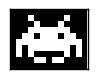

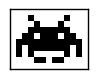

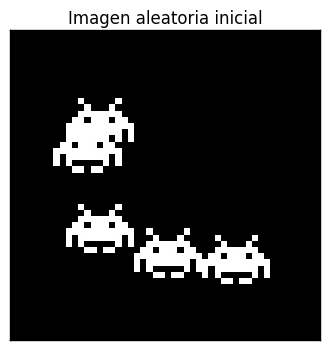

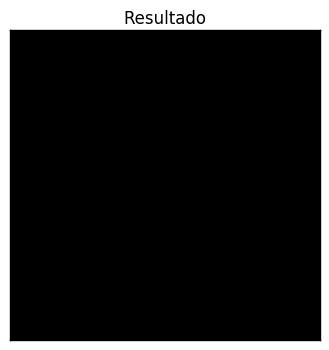

In [8]:
im_martian = martian()
im = np.zeros((50,50))

Z = np.random.randint(0,high=max(im.shape)-max(im_martian.shape),size=(2,5))

print(Z)
for z in Z.T:
    idx = np.array(np.nonzero(im_martian))+z.reshape((2,1))
    im[idx[0],idx[1]] = 1

im_op = (im_martian,1-im_martian)

z_op = np.array([5,6])

im_h = hitormiss(im,im_op,z_op)

plt.figure(figsize=(1,1))
plt.imshow(im_op[0],cmap='gray',interpolation='none'),plt.xticks([]),plt.yticks([])
plt.show()

plt.figure(figsize=(1,1))
plt.imshow(im_op[1],cmap='gray',interpolation='none'),plt.xticks([]),plt.yticks([])
plt.show()

plt.imshow(im,cmap='gray',interpolation='none'),plt.xticks([]),plt.yticks([])
plt.title('Imagen aleatoria inicial')
plt.show()

plt.imshow(im_h,cmap='gray',interpolation='none'),plt.xticks([]),plt.yticks([])
plt.title('Resultado')
plt.show()


## Prueba del algoritmo de adelgazamiento

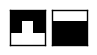

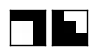

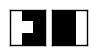

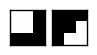

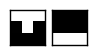

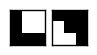

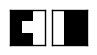

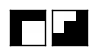

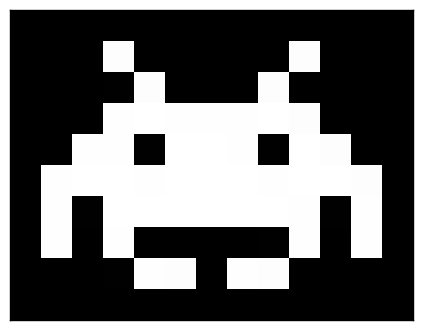

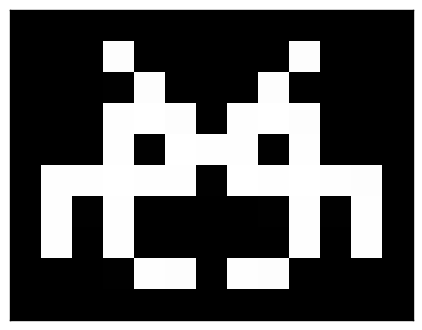

In [9]:
im = np.ones((7,11))
im[0::6,:] = 0
im[2:,-2:] = 0
im[-2,3:5] = 0
im = martian()
#im = gonzalexample()
#im = cv2.imread('martian.png',0)
#im = cv2.imread('image_thumb.png',0)
im[im>0] = 1

i1H = np.zeros((3,3))
i1H[np.array([1,2,2,2]),np.array([1,0,1,2])] = 1
i1M = np.zeros((3,3))
i1M[np.array([0,0,0]),np.array([0,1,2])] = 1

i2H = np.zeros((3,3))
i2H[np.array([1,1,2,2]),np.array([0,1,0,1])] = 1
i2M = np.zeros((3,3))
i2M[np.array([0,0,1]),np.array([1,2,2])] = 1

z_op = np.array([1,1])

im_t = im.copy()
for i in range(0,32):
    im_op = (i1H,i1M)
    im_t = thinning(im_t,im_op,z_op)
    
    if i<4:
        plt.figure(figsize=(1,2))
        plt.subplot(121),plt.imshow(im_op[0],cmap='gray',interpolation='none'),plt.xticks([]),plt.yticks([])
        plt.subplot(122),plt.imshow(im_op[1],cmap='gray',interpolation='none'),plt.xticks([]),plt.yticks([])
        plt.show()

    im_op = (i2H,i2M)
    im_t = thinning(im_t,im_op,z_op)

    if i<4:
        plt.figure(figsize=(1,2))
        plt.subplot(121),plt.imshow(im_op[0],cmap='gray',interpolation='none'),plt.xticks([]),plt.yticks([])
        plt.subplot(122),plt.imshow(im_op[1],cmap='gray',interpolation='none'),plt.xticks([]),plt.yticks([])
        plt.show()

    i1H = np.rot90(i1H,3)
    i1M = np.rot90(i1M,3)
    i2H = np.rot90(i2H,3)
    i2M = np.rot90(i2M,3)

plt.imshow(im,cmap='gray',interpolation='none'),plt.xticks([]),plt.yticks([])
plt.show()

plt.imshow(im_t,cmap='gray',interpolation='none'),plt.xticks([]),plt.yticks([])
plt.show()
